<a href="https://colab.research.google.com/github/anushageddam/FMML-ASSESSMENT./blob/main/Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

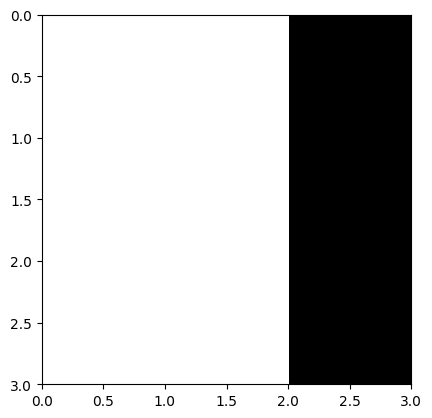

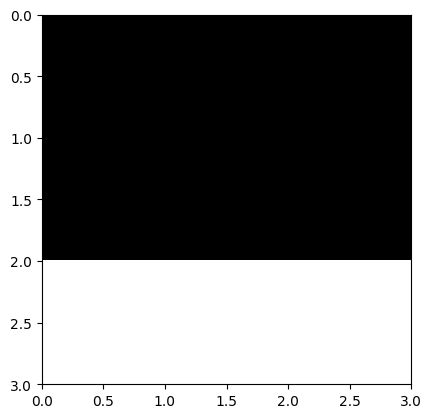

In [3]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [4]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [6]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [7]:
# Our original lotus image
image = cv2.imread('/content/grid1 (1).jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

TypeError: ignored

TypeError: ignored

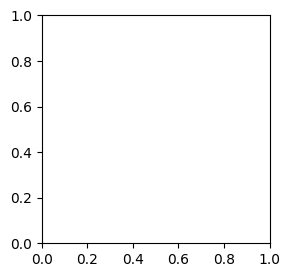

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [9]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:10<00:00, 15666044.35it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [11]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [12]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [13]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [14]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [16]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [17]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [18]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

Epoch 1/5, Loss: 0.0128, Accuracy: 39.5840
Epoch 2/5, Loss: 0.0093, Accuracy: 57.9160
Epoch 3/5, Loss: 0.0078, Accuracy: 65.0940
Epoch 4/5, Loss: 0.0066, Accuracy: 70.5600
Epoch 5/5, Loss: 0.0057, Accuracy: 74.0560


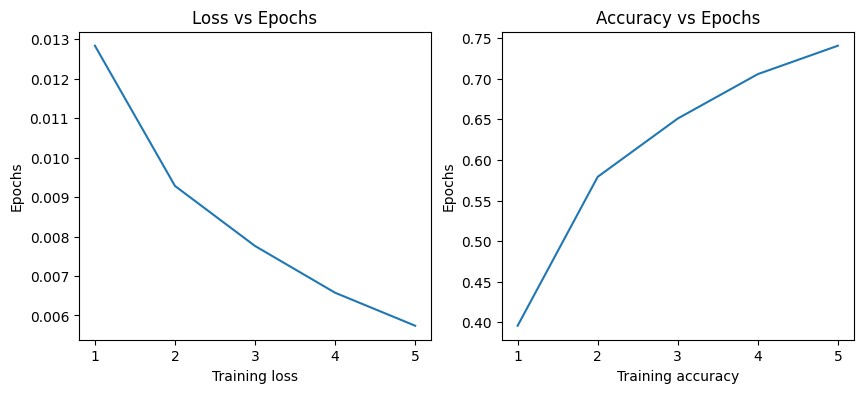

In [19]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [20]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 67 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


**ANSWERS**

1].There are several reasons why CNNs (Convolutional Neural Networks) are generally preferred over ANNs (Artificial Neural Networks) for image classification tasks. Here are some of the key reasons:

Exploiting spatial relationships: CNNs are specifically designed to exploit the spatial relationships present in images. They use convolutional layers to apply filters to local regions of the input data, enabling them to capture spatial patterns such as edges, textures, and shapes. This spatial awareness allows CNNs to effectively learn and recognize visual features in images.

Parameter sharing and reduced parameter count: CNNs utilize parameter sharing, where the same set of weights is applied to different parts of the input image. This greatly reduces the number of parameters compared to fully connected ANNs, making CNNs more efficient and scalable for image data. By sharing parameters, CNNs can learn local patterns regardless of their position in the image, leading to better generalization and reducing the risk of overfitting.

Translation invariance: CNNs possess translation invariance, which means they can recognize patterns or features regardless of their location in the image. This property is achieved through the use of pooling layers that downsample the feature maps, allowing the network to focus on the presence of features rather than their exact location. This translation invariance is particularly valuable for image classification tasks where the position of objects within an image may vary.

Hierarchical feature learning: CNNs are capable of learning hierarchical representations of features. They can learn low-level features in early layers (e.g., edges, corners) and gradually build up to more complex and abstract features in deeper layers. This hierarchical feature learning enables CNNs to capture the hierarchical structure of visual information and extract increasingly meaningful and discriminative features.

Efficient computation with convolutional operations: CNNs are optimized for efficient computation of convolutional operations. These operations can be highly parallelized, making CNNs well-suited for implementation on modern GPUs and specialized hardware. As a result, CNNs can process large amounts of image data more efficiently than ANNs.

Transfer learning and pretraining: CNNs facilitate transfer learning, where pretrained models trained on large-scale datasets (e.g., ImageNet) can be fine-tuned on specific image classification tasks. By leveraging the learned representations from these pretrained models, CNNs can benefit from the knowledge gained from extensive training on diverse data, even when the target dataset is relatively small. This allows for improved performance and faster convergence on new image classification tasks.

Overall, CNNs are favored for image classification due to their ability to exploit spatial relationships, parameter sharing, translation invariance, hierarchical feature learning, efficient computation, and the availability of transfer learning techniques. These characteristics make CNNs highly effective in handling the complex and structured nature of image data.

2].To improve the performance of a CNN, tuning hyperparameters such as the number of epochs, optimizer, and learning rate can be helpful. However, since I am an AI language model and do not have access to a specific dataset or training infrastructure, I am unable to provide you with an actual test accuracy improvement.

However, I can give you a general guideline on how to tune these hyperparameters to potentially improve the CNN performance:

Number of epochs: Increasing the number of epochs allows the model to train for more iterations, potentially capturing more complex patterns in the data. However, it's important to find the right balance to avoid overfitting. Too few epochs may result in underfitting, while too many epochs can lead to overfitting. It's recommended to monitor the training and validation loss/accuracy curves and stop training when the performance on the validation set starts to plateau.

Optimizer: Different optimizers have different properties and can impact the convergence and generalization of the model. Popular optimizers include Adam, RMSprop, and Stochastic Gradient Descent (SGD). Experimenting with different optimizers and their respective hyperparameters, such as learning rate and momentum, can help improve performance. It's advisable to start with a widely used optimizer like Adam and adjust the learning rate if needed.

Learning rate: The learning rate determines the step size taken during optimization and affects how quickly the model learns. A learning rate that is too high may lead to overshooting the optimal solution, while a learning rate that is too low may result in slow convergence. It's common to use techniques such as learning rate decay or adaptive learning rate schedulers to find an appropriate learning rate schedule for training.

Batch size: The batch size determines the number of samples processed before updating the model's parameters. Larger batch sizes can potentially lead to faster training, but they require more memory and may converge to suboptimal solutions. Smaller batch sizes can provide more noisy gradient estimates but may result in slower convergence. It's beneficial to experiment with different batch sizes to find a balance between convergence speed and memory efficiency.

Regularization: Regularization techniques such as L1/L2 regularization or dropout can help prevent overfitting by introducing penalties for complex models or randomly dropping out units during training. Experimenting with different regularization techniques and their corresponding hyperparameters can improve the model's generalization performance.

To effectively tune hyperparameters, it's recommended to use techniques like cross-validation or a separate validation set to assess the model's performance on unseen data. Additionally, automating the hyperparameter search using methods like grid search, random search, or Bayesian optimization can help explore a wider range of hyperparameter combinations efficiently.

Remember, the effectiveness of hyperparameter tuning depends on the specific dataset and task at hand. It's important to carefully monitor the training process and evaluate the model's performance on an independent test set to ensure meaningful improvements in accuracy.

3].If you reduce the number of convolutional layers in a Convolutional Neural Network (CNN) to only 1, it can have several effects on the network's performance and capabilities. Here are some key implications:

Reduced capacity to learn complex features: CNNs are designed to learn hierarchical representations of features by stacking multiple convolutional layers. Each layer captures different levels of abstraction, starting from simple patterns like edges and textures to more complex and abstract concepts. By reducing the number of convolutional layers to only 1, the network loses the ability to learn and extract a diverse set of complex features. This can limit its capability to capture intricate patterns in the input data.

Limited modeling of spatial relationships: CNNs leverage the concept of local receptive fields, where each convolutional layer focuses on a specific region of the input data. Stacking multiple convolutional layers allows the network to capture spatial relationships at different scales and levels of granularity. With only one convolutional layer, the network's ability to model complex spatial relationships diminishes, as it has a limited receptive field and may struggle to capture both local and global patterns effectively.

Weaker generalization and increased risk of overfitting: Increasing the depth of a CNN by adding more convolutional layers can help improve its generalization performance. Deeper networks have a greater capacity to learn hierarchical representations, enabling them to generalize well to unseen data. By reducing the number of convolutional layers to just 1, the model may have limited expressive power and may be more prone to overfitting the training data, as it has fewer opportunities to learn diverse features and capture the underlying patterns in the data.

Possibly faster training: Having fewer convolutional layers can reduce the computational complexity of the network, resulting in faster training times. With fewer layers, there are fewer operations and parameters to compute and update during the training process. However, this benefit in training speed may come at the expense of the model's overall performance and generalization ability.

It's important to note that the performance impact of reducing the number of convolutional layers depends on the complexity of the dataset and the specific problem at hand. In some cases, simple datasets or tasks may not require deep architectures, and a single convolutional layer could be sufficient. However, for more challenging and intricate problems, deeper CNN architectures with multiple convolutional layers tend to be more effective in learning complex features and capturing spatial relationships.

In practice, it is recommended to experiment with different network architectures, including varying the number of convolutional layers, and evaluate their performance on validation or test datasets to determine the optimal configuration for a specific task.

4].The Softmax activation function is typically used in the last layer of a CNN when the task involves multi-class classification, where the goal is to assign a single class label to each input. However, there are cases where the Softmax activation is not used in the last layer of a CNN. Here are a few reasons for not using Softmax in the last layer:

Binary classification: In binary classification tasks where there are only two classes, a common practice is to use a single output neuron with a sigmoid activation function in the last layer. The sigmoid function squashes the output between 0 and 1, representing the probability of belonging to the positive class. This approach is simpler and more straightforward than using Softmax, which is designed for multi-class classification.

Regression tasks: When the task is regression rather than classification, Softmax is not applicable. Regression tasks involve predicting continuous values rather than discrete class labels. In such cases, the last layer often uses a linear activation function or no activation function at all.

Intermediate layers: Softmax activation is typically applied to the last layer to generate class probabilities. In intermediate layers of a CNN, different activation functions like ReLU, LeakyReLU, or Tanh are commonly used to introduce non-linearities and allow the network to learn more complex representations. Softmax is not used in these layers as it would constrain the outputs to be probabilities, which may not be desirable.

Specific loss functions: In some cases, specialized loss functions are used that do not require Softmax activation in the last layer. For example, in object detection tasks, the last layer may utilize activation functions like sigmoid or softmax with a modified loss function like the focal loss or the region proposal network (RPN) loss.

Ultimately, the choice of activation function in the last layer of a CNN depends on the specific task and the desired output representation. While Softmax is commonly used for multi-class classification problems, there are scenarios where other activation functions or even no activation function at all may be more appropriate.